# Theme of this notebook - theories of forex trading (4) - Interest Rate Parity
* This is a memo for one of the theiries for forex trading - Interest Rate Parity

# What is Interest Rate Parity?
* Interest Rate Parity is one of the theories to forecast the theoretical prices of a target currency.
* This theory indicates that the currency exchange rate is determined so that the rate of return is the same regardless of which currency the asset is held in as long as the following three assumptions are satisfied.

> (1) Free capital mobility<br>
There is no restrictions on capital flows between two countries.<br>
<br>
(2) No transaction cost<br>
Transaction is without charge or carries only a negligible charge.<br>
<br>
(3) No default risk<br>
Financial investment is safe against business defaults, country risks, etc.

* The following image is the overview of interest rate parity

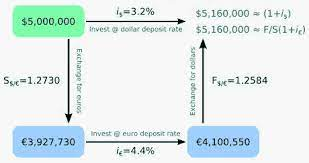

* The formula is as follows.

### Uncovered Interest Rate Parity
$E(S_{t+1})$ = $S_t$$\frac{1 \ + \ i_{(home,t+1)}}{1 \ + \ i_{(foreign,t+1)}} $
<br>

> Where,<br>
$E(S_{t+1})$ = Expected currency exchange rate on t+1<br>
$S_{t}$ = Currency exchange rate on t<br>
$i_{(home,t+1)}$ = interest rate of home country on t+1<br>
$i_{(foreign,t+1)}$ = interest rate of foreign country on t+1

### Covered Interest Rate Parity
$F_{t+1}$ = $S_t$$\frac{1 \ + \ i_{(home,t+1)}}{1 \ + \ i_{(foreign,t+1)}} $
<br>

> Where,<br>
$F_{t+1}$ = Forward currency exchange rate on t+1<br>
$S_{t}$ = Currency exchange rate on t<br>
$i_{(home,t+1)}$ = interest rate of home country on t+1<br>
$i_{(foreign,t+1)}$ = interest rate of foreign country on t+1


* Let's calculate the theoretical price of USD/JPY as an example.
* Note: I only calculated the theoretical price based on uncovered interest rate parity.

In [178]:
# First, import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statsmodels.api as sm
import yfinance as yf

In [190]:
# Retrive USD-JPY Yahoo Finance data from 2000M1 to 2023M10 on a quarterly basis
usdjpy = yf.download('JPY=X', start='2000-01-01', end='2023-10-31', interval='3mo')

[*********************100%%**********************]  1 of 1 completed


In [191]:
# Create DataFrame
usdjpy = pd.DataFrame(usdjpy.loc['2000-01-01':'2023-10-31', 'Adj Close'])
usdjpy

,Adj Close
Date,
2000-01-01,102.959999
2000-04-01,106.010002
2000-07-01,108.129997
2000-10-01,114.610001
2001-01-01,126.110001
...,...
2022-10-01,131.110001
2023-01-01,133.201004
2023-04-01,144.779999


* Then, let's calculate theoretical prices based on interest rate parity
* I used the rate of return on 10-year tresuary bond in the U.S. and Japan as interest rates

In [192]:
# Retrive ten-year treasury data from 2000M1 to 2023M10 on a quarterly basis
usa_10year = yf.download('^TNX', start='2000-01-01', end='2023-10-31', interval='3mo')
usa_10year

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-01,6.498,6.823,5.937,6.023,6.023,0
2000-04-01,6.002,6.564,5.706,6.018,6.018,0
2000-07-01,6.035,6.180,5.571,5.778,5.778,0
2000-10-01,5.791,5.897,4.994,5.110,5.110,0
2001-01-01,5.075,5.494,4.689,4.915,4.915,0
...,...,...,...,...,...,...
2022-10-01,3.712,4.333,3.402,3.879,3.879,0
2023-01-01,3.758,4.091,3.295,3.494,3.494,0
2023-04-01,3.517,3.872,3.253,3.819,3.819,0


* As for Japanese 10-year bond, you can retrieve data from FRED.<br>
[FRED]<br>
https://fred.stlouisfed.org/series/IRLTLT01JPQ156N

In [193]:
# Use read_csv function
jpn_10year = pd.read_csv("fin-010_IRLTLT01JPQ156N.csv")
jpn_10year

,DATE,IRLTLT01JPQ156N
0,2000-01-01,1.768667
1,2000-04-01,1.703000
2,2000-07-01,1.771667
3,2000-10-01,1.734333
4,2001-01-01,1.364000
...,...,...
91,2022-10-01,0.301667
92,2023-01-01,0.436667
93,2023-04-01,0.403333
94,2023-07-01,0.666667


In [194]:
# Set returns of ten-year treasury bill
returns = pd.DataFrame()
returns['USA_10year'] = (usa_10year.loc['2000-01-01':'2023-10-01', 'Adj Close'])/100
returns['JPN_10year'] = (jpn_10year.loc[:,'IRLTLT01JPQ156N'].values)/100

* Let's compare theoritical price with actual price

### Uncovered Interest Rate Parity
$E(S_{t+1})$ = $S_t$$\frac{1 \ + \ i_{(home,t+1)}}{1 \ + \ i_{(foreign,t+1)}} $
<br>

> Where,<br>
$E(S_{t+1})$ = Expected currency exchange rate on t+1<br>
$S_{t}$ = Currency exchange rate on t<br>
$i_{(home,t+1)}$ = interest rate of home country on t+1<br>
$i_{(foreign,t+1)}$ = interest rate of foreign country on t+1

In [195]:
# Calculate interest rate ratio between japan(home country) and USA(foreign coutry)
returns['IR_Ratio'] = (1+returns['JPN_10year']) / (1+returns['USA_10year'])
returns

,USA_10year,JPN_10year,IR_Ratio
Date,,,
2000-01-01,0.06023,0.017687,0.959873
2000-04-01,0.06018,0.017030,0.959299
2000-07-01,0.05778,0.017717,0.962125
2000-10-01,0.05110,0.017343,0.967884
2001-01-01,0.04915,0.013640,0.966154
...,...,...,...
2022-10-01,0.03879,0.003017,0.965562
2023-01-01,0.03494,0.004367,0.970459
2023-04-01,0.03819,0.004033,0.967100


In [196]:
# In order to calculate theoretical price, retrieve data from 1999M10 to 2023M7
usdjpy_forecast = yf.download('JPY=X', start='1999-01-01', end='2023-07-02', interval='3mo')
usdjpy_forecast = usdjpy_forecast.loc['1999-10-01':'2023-07-02', 'Adj Close']
usdjpy_forecast

[*********************100%%**********************]  1 of 1 completed


Date
1999-10-01    102.180000
2000-01-01    102.959999
2000-04-01    106.010002
2000-07-01    108.129997
2000-10-01    114.610001
                 ...    
2022-07-01    144.431000
2022-10-01    131.110001
2023-01-01    133.201004
2023-04-01    144.779999
2023-07-01    140.757996
Name: Adj Close, Length: 96, dtype: float64

In [197]:
# Create another Dataframe to compare actual price with theoritical price
compare1 = pd.DataFrame()
compare1['Actual_USDJPY'] = (usdjpy.loc['2000-01-01':'2023-10-31', 'Adj Close'])
compare1['Theoretical_USDJPY'] = usdjpy_forecast.values * returns['IR_Ratio'].values
compare1

,Actual_USDJPY,Theoretical_USDJPY
Date,,
2000-01-01,102.959999,98.079873
2000-04-01,106.010002,98.769462
2000-07-01,108.129997,101.994882
2000-10-01,114.610001,104.657342
2001-01-01,126.110001,110.730859
...,...,...
2022-10-01,131.110001,139.457157
2023-01-01,133.201004,127.236858
2023-04-01,144.779999,128.818663


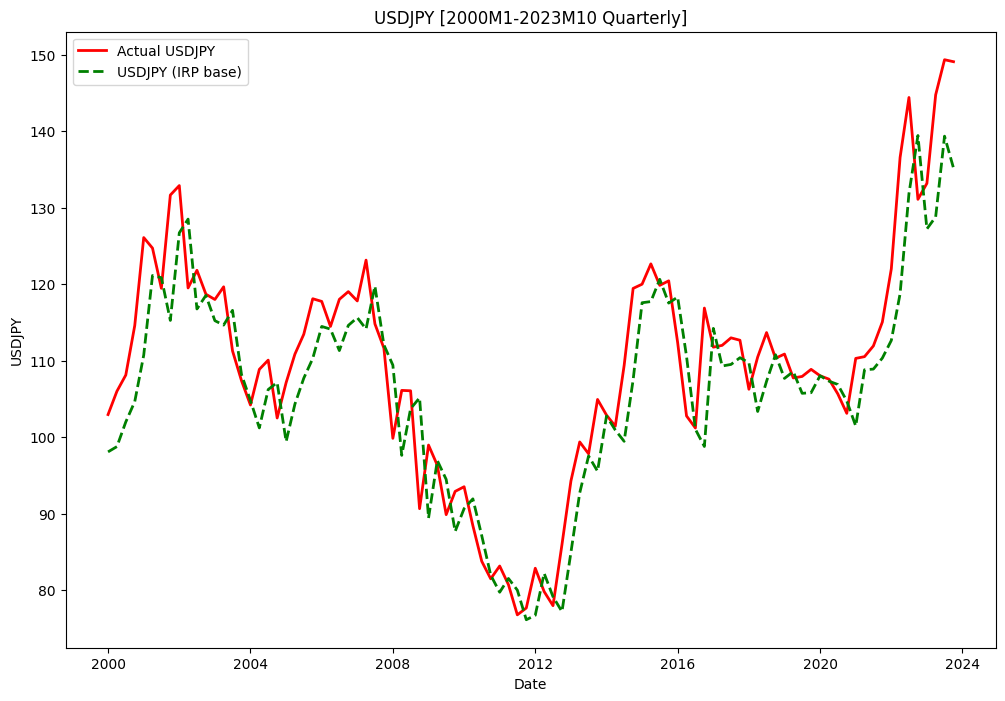

In [198]:
# Vidualize actual prices and theoretical prices by using matplotlib
fig, ax = plt.subplots(figsize=(12, 8))

x = compare1.index
actual_price = compare1['Actual_USDJPY'].values
IRP_base = compare1['Theoretical_USDJPY'].values

ax.plot(x, actual_price, label='Actual USDJPY', color='r', linewidth=2,linestyle ='solid')
ax.plot(x, IRP_base, label='USDJPY (IRP base)', color='g', linewidth=2,linestyle ='dashed')

ax.set_xlabel('Date',loc='center')
ax.set_ylabel('USDJPY')
ax.set_title('USDJPY [2000M1-2023M10 Quarterly]')

plt.legend(loc = 'best')
plt.show()

### Let's check another perspective
* In terms of change rate, we can convert uncovered Interest rate parity into the following formula
<br><br>
$\frac{E(S_{t+1})-S_t}{S_t} = i_{foreign} - i_{home}$
<br>

> Where,<br>
$E(S_{t+1})$ = Expected currency exchange rate on t+1<br>
$S_{t}$ = Currency exchange rate on t<br>
$i_{foreign}$ = interest rate of foreign country<br>
$i_{home}$ = interest rate of home country


In [199]:
# Calculate difference in interest rate between USA(foreign coutry) - japan(home country)
returns['IR_diff'] = returns['USA_10year'] - returns['JPN_10year']
returns

,USA_10year,JPN_10year,IR_Ratio,IR_diff
Date,,,,
2000-01-01,0.06023,0.017687,0.959873,0.042543
2000-04-01,0.06018,0.017030,0.959299,0.043150
2000-07-01,0.05778,0.017717,0.962125,0.040063
2000-10-01,0.05110,0.017343,0.967884,0.033757
2001-01-01,0.04915,0.013640,0.966154,0.035510
...,...,...,...,...
2022-10-01,0.03879,0.003017,0.965562,0.035773
2023-01-01,0.03494,0.004367,0.970459,0.030573
2023-04-01,0.03819,0.004033,0.967100,0.034157


In [200]:
# Compare actual change rates and theoretical change rate
compare2 = pd.DataFrame()
compare2['Actual_USDJPY_change'] = usdjpy['Adj Close'].pct_change().dropna()
compare2['Theoretical_USDJPY_change'] = returns.loc['2000-04-01':'2023-10-01','IR_diff'].dropna()
compare2

,Actual_USDJPY_change,Theoretical_USDJPY_change
Date,,
2000-04-01,0.029623,0.043150
2000-07-01,0.019998,0.040063
2000-10-01,0.059928,0.033757
2001-01-01,0.100340,0.035510
2001-04-01,-0.010943,0.041510
...,...,...
2022-10-01,-0.092231,0.035773
2023-01-01,0.015948,0.030573
2023-04-01,0.086929,0.034157


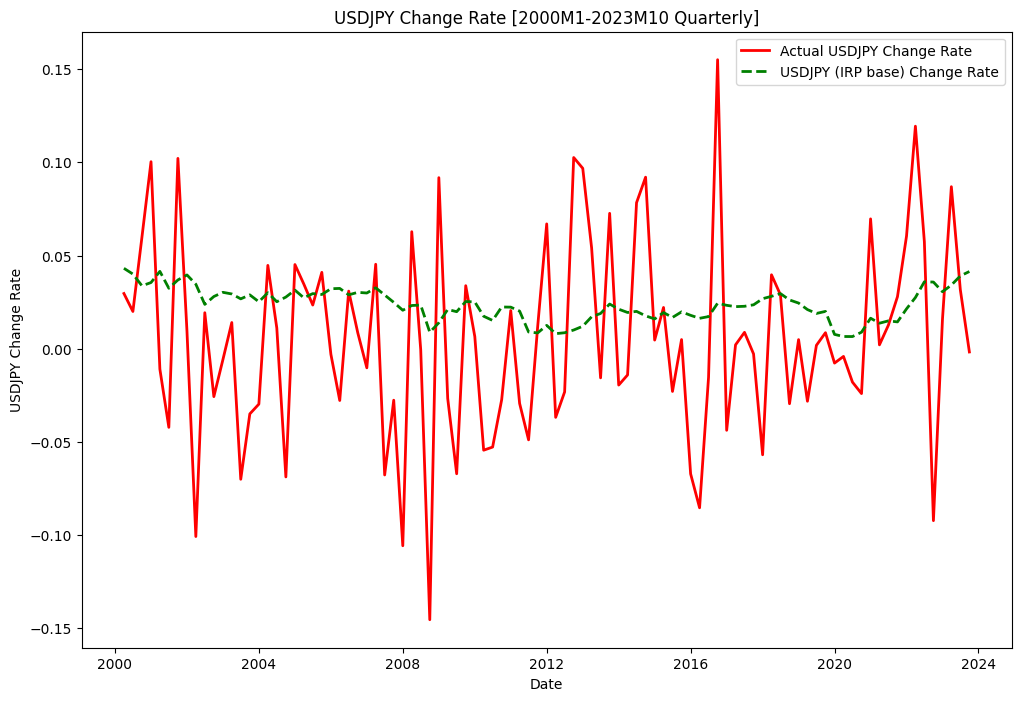

In [201]:
# Vidualize actual change rate and theoretical change rate by using matplotlib
fig, ax = plt.subplots(figsize=(12, 8))

x = compare2.index
actual_price_change = compare2['Actual_USDJPY_change'].values
IRP_base_change = compare2['Theoretical_USDJPY_change'].values

ax.plot(x, actual_price_change, label='Actual USDJPY Change Rate', color='r', linewidth=2,linestyle ='solid')
ax.plot(x, IRP_base_change, label='USDJPY (IRP base) Change Rate', color='g', linewidth=2,linestyle ='dashed')

ax.set_xlabel('Date',loc='center')
ax.set_ylabel('USDJPY Change Rate')
ax.set_title('USDJPY Change Rate [2000M1-2023M10 Quarterly]')

plt.legend(loc = 'best')
plt.show()

# Check R-squared values

In [202]:
# Set intercept to forecast beta by using statsmodel
IRP_base_change  = sm.add_constant(IRP_base_change)

# Build a simple linear regression model
model_IRP = sm.OLS(actual_price_change,IRP_base_change)
result_IRP = model_IRP.fit()
result_IRP.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.500
Date:                Thu, 01 Feb 2024   Prob (F-statistic):              0.224
Time:                        01:10:07   Log-Likelihood:                 144.84
No. Observations:                  95   AIC:                            -285.7
Df Residuals:                      93   BIC:                            -280.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0127      0.016     -0.811      0.420      -0.044       0.018
x1             0.7634      0.623      1.225      0.224      -0.474       2.001
==============================================================================
Omnibus:                        1.112   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.573   Jarque-Bera (JB):                0.615
Skew:                           0.129   Prob(JB):                        0.735
Kurtosis:                       3.299   Cond. No.                         114.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Conclusion
* Python enables us to beautifully describe the relationship between forex prices and interest rate of specific countries.